***Preferencias en el Uso de Canales***

# ***Limpieza de datos y Analisis Univariables***
Por Tatiana Molina - Carolina Alvarez

## **0. Introducción:**

El análisis presentado se hace a partir de una muestra de 35.000 contactos de clientes de un fondo de pensiones y cesantias de Colombia, entre febrero de 2020 y febrero de 2021.

**Alcance:**
* Contacto por canales asistidos
* Clientes personas (se exluyen empleadores ya que desde el negocio sabemos que se comportan muy diferente

## **1. Consultar la base de datos de contactos y clientes**

Realizamos una lectura de los datos del repositorio para consultas de la organización (Google Cloud), al tratarse de datos confidenciales no es posible ejecutar estas celdas desde fuentes externas.

Para este primer análisis utilizamos los datos de contactos de los clientes originados de la plataforma de CRM que realizaron desde febrero de 2020 y febrero de 2021. Adicionalmente, agregamos información de segmentación de los clientes y datos como (Edad, ubicación …), el dataset inicial se amplia con información de los clientes como el salario, el estado de sus prodcutos y su nivel de virtualización.

En el presente notebook se realiza el preprosesamiento de los datos, dado que algunas variables presentan datos nulos o no esta unficados, adicional se eliminaron datos atipicos.


In [ ]:
from google.cloud import bigquery

In [ ]:
import pandas_gbq

In [ ]:
client = bigquery.Client(location="US")

**Importante**: Teniendo en cuenta la condifencialidad de la información contenida en este trabajo, se omite el query de consulta a la base de datos

In [ ]:
df = query_job.to_dataframe()

## **2. Identificación de variables**
Se hace la revisión y ajuste de cada variable con respecto a su calidad, datos faltantes y atípicos

In [ ]:
#Canal de contacto al cual llega el cliente en cada iteración
df['descCanalRadicacion'].unique()

array(['OFICINA DE SERVICIO', 'GESTION DOCUMENTAL',
       'LÍNEA DE SERVICIO EMPRESAS', 'PORTAL WEB / NO AUTENTICADO',
       'LÍNEA DE SERVICIO AFILIADOS', 'GESTIÓN DOCUMENTAL',
       'COMERCIAL WM', 'OFICINA VIRTUAL', 'CHAT ASESOR',
       'CENTRO DE EXPERIENCIA VIRTUAL',
       'EJECUTIVO DE ASISTENCIA EMPRESARIAL', 'LÍNEA DE SERVICIO',
       'PORTAL  WEB', 'ESTRUCTURA COMERCIAL', 'CORREO ELECTRÓNICO',
       'SIN CLASIFICAR', 'EMPLEADO/TERCERO', 'COMERCIAL NI',
       'CENTRO DE SOPORTE A CANALES', 'PROCESO', 'MESA DE APOYO'],
      dtype=object)

In [ ]:
# unificar canales con nombre equivalente
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('LÍNEA DE SERVICIO', 'LINEA DE SERVICIO')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('LÍNEA DE SERVICIO AFILIADOS', 'LINEA DE SERVICIO')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('PORTAL WEB / NO AUTENTICADO', 'PORTAL  WEB')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('GESTION DOCUMENTAL', 'GESTIÓN DOCUMENTAL')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('COMERCIAL WM', 'ESTRUCTURA COMERCIAL')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('COMERCIAL NI', 'ESTRUCTURA COMERCIAL')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('CENTRO DE EXPERIENCIA VIRTUAL', 'OFICINA VIRTUAL')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('CHAT PROTECCIÓN', 'CHAT ASESOR')

In [ ]:
df['descCanalRadicacion'].unique()

array(['OFICINA DE SERVICIO', 'GESTIÓN DOCUMENTAL',
       'LÍNEA DE SERVICIO EMPRESAS', 'PORTAL  WEB', 'LINEA DE SERVICIO',
       'ESTRUCTURA COMERCIAL', 'OFICINA VIRTUAL', 'CHAT ASESOR',
       'EJECUTIVO DE ASISTENCIA EMPRESARIAL', 'CORREO ELECTRÓNICO',
       'SIN CLASIFICAR', 'EMPLEADO/TERCERO',
       'CENTRO DE SOPORTE A CANALES', 'PROCESO', 'MESA DE APOYO'],
      dtype=object)

In [ ]:
#Eliminamos medios de contacto no reconocidos como canales o que son para atención de empresas
#ya que no estan dentro del alcance del proyecto

df=df.drop(df[df['descCanalRadicacion'] == 'EMPLEADO/TERCERO'].index) #interno
df=df.drop(df[df['descCanalRadicacion'] == 'MESA DE APOYO'].index) #interno
df=df.drop(df[df['descCanalRadicacion'] == 'SIN CLASIFICAR'].index) # no identificado
df=df.drop(df[df['descCanalRadicacion'] == 'CORREO ELECTRÓNICO'].index) # no identificado
df=df.drop(df[df['descCanalRadicacion'] == 'PROCESO'].index) #interno
df=df.drop(df[df['descCanalRadicacion'] == 'LÍNEA DE SERVICIO EMPRESAS'].index) # no es público objetivo
df=df.drop(df[df['descCanalRadicacion'] == 'EJECUTIVO DE ASISTENCIA EMPRESARIAL'].index) # no es público objetivo
df=df.drop(df[df['descCanalRadicacion'] == 'CENTRO DE SOPORTE A CANALES'].index) # no es público objetivo

In [ ]:
 #Tema: motivo del contacto
#homologar tipologias equivalentes 
df['descTema'] = df['descTema'].replace('ACTUALIZACIÓN DE DATOS (AFILIADO-SER)', 'ACTUALIZACIÓN DE DATOS')
df['descTema'] = df['descTema'].replace('ACTUALIZACIÓN DE DATOS (EMPLEADOR-SER)', 'ACTUALIZACIÓN DE DATOS')
df['descTema'] = df['descTema'].replace('ACTUALIZACIÓN DE DATOS (NO CLIENTE-SER)', 'ACTUALIZACIÓN DE DATOS')
df['descTema'] = df['descTema'].replace('AFILIACIÓN Y TRASLADO DE ENTRADA (AFILIADO-SER)', 'AFILIACIONES Y TRASLADOS')
df['descTema'] = df['descTema'].replace('AFILIACIÓN Y TRASLADO DE ENTRADA (EMPLEADOR-SER)', 'AFILIACIONES Y TRASLADOS')
df['descTema'] = df['descTema'].replace('TRASLADOS DE SALIDA Y CANCELACIÓN DE PRODUCTOS (AFILIADO-SER)', 'AFILIACIONES Y TRASLADOS')
df['descTema'] = df['descTema'].replace('APORTES Y PLANILLAS (EMPLEADOR-SER)', 'APORTES Y PLANILLAS')
df['descTema'] = df['descTema'].replace('APORTES Y PLANILLAS (AFILIADO-SER)', 'APORTES Y PLANILLAS')
df['descTema'] = df['descTema'].replace('ASESORÍA PENSIONAL (AFILIADO-SER)', 'ASESORÍA PENSIONAL')
df['descTema'] = df['descTema'].replace('BENEFICIOS Y PENSIONES', 'ASESORÍA PENSIONAL')
df['descTema'] = df['descTema'].replace('HISTORIA LABORAL PARA BONO PENSIONAL', 'ASESORÍA PENSIONAL')
df['descTema'] = df['descTema'].replace('ASESORÍA PENSIONAL (EMPLEADOR-SER)', 'ASESORÍA PENSIONAL')
df['descTema'] = df['descTema'].replace('CANALES DE SERVICIO (AFILIADO-SER)', 'CANALES DE ATENCIÓN')
df['descTema'] = df['descTema'].replace('CANALES DE ATENCIÓN Y/O ASESORÍA', 'CANALES DE ATENCIÓN')
df['descTema'] = df['descTema'].replace('CANALES DE SERVICIO (EMPLEADOR-SER)', 'CANALES DE ATENCIÓN')
df['descTema'] = df['descTema'].replace('CERTIFICADOS Y EXTRACTOS (AFILIADO-SER)', 'CERTIFICADOS')
df['descTema'] = df['descTema'].replace('CERTIFICADOS, CONSTANCIAS Y EXTRACTOS', 'CERTIFICADOS')
df['descTema'] = df['descTema'].replace('CERTIFICADOS Y EXTRACTOS (EMPLEADOR-SER)', 'CERTIFICADOS')
df['descTema'] = df['descTema'].replace('DEUDAS E INCONSISTENCIAS (EMPLEADOR-SER)', 'DEUDAS E INCONSISTENCIAS')
df['descTema'] = df['descTema'].replace('INCONSISTENCIAS Y COBRO', 'DEUDAS E INCONSISTENCIAS')
df['descTema'] = df['descTema'].replace('PAGOS Y RETIROS (AFILIADO-SER)', 'PAGOS Y RETIROS')
df['descTema'] = df['descTema'].replace('PAGOS Y RETIROS (NO CLIENTE-SER)', 'PAGOS Y RETIROS')
df['descTema'] = df['descTema'].replace('RETIROS', 'PAGOS Y RETIROS')
df['descTema'] = df['descTema'].replace('PENSIONADO (AFILIADO-SER)', 'PENSIONADO')
df['descTema'] = df['descTema'].replace('SALDOS Y RENTABILIDADES (AFILIADO-SER)', 'SALDOS Y RENTABILIDADES')
df['descTema'] = df['descTema'].replace('MOVIMIENTOS DE CUENTA (AFILIADO-SER)', 'MOVIMIENTOS DE CUENTA')
df['descTema'] = df['descTema'].replace('EMBARGOS, PIGNORACIONES E INMOVILIZACIONES (AFILIADO-SER)', 'MOVIMIENTOS DE CUENTA')
df['descTema'] = df['descTema'].replace('CANALES DE SERVICIO (NO CLIENTE-SER)', 'CANALES DE ATENCIÓN')
df['descTema'] = df['descTema'].replace('CERTIFICADOS Y EXTRACTOS (NO CLIENTE-SER)', 'CERTIFICADOS')
df['descTema'] = df['descTema'].replace('PAGOS Y RETIROS (EMPLEADOR-SER)', 'PAGOS Y RETIROS')

In [ ]:
#Eliminar temas de contacto que no son representativos debido a su volumen
df=df.drop(df[df['descTema'] == 'ALIANZAS'].index)
df=df.drop(df[df['descTema'] == 'ALIANZAS, CRÉDITOS Y SEGUROS (AFILIADO-SER)'].index)
df=df.drop(df[df['descTema'] == 'GENÉRICO MIGRACIÓN SER'].index)
df=df.drop(df[df['descTema'] == 'PLANES INSTITUCIONALES Y RENTAS TEMPORALES'].index)
df=df.drop(df[df['descTema'] == 'PQRS (AFILIADO-SER)'].index)
df=df.drop(df[df['descTema'] == 'PQRS (EMPLEADOR-SER)'].index)
df=df.drop(df[df['descTema'] == 'SOCIEDAD ADMINISTRADORA'].index)
df=df.drop(df[df['descTema'] == 'INFORMACIÓN DE PROTECCIÓN, EL SECTOR Y REGULACIÓN (AFILIADO-SER)'].index)
df=df.drop(df[df['descTema'] == 'INFORMACIÓN DE PROTECCIÓN, EL SECTOR Y REGULACIÓN (NO CLIENTE-SER)'].index)
df=df.drop(df[df['descTema'] == 'CRÉDITOS Y SEGUROS (AFILIADO-SER)'].index)
df=df.drop(df[df['descTema'] == 'MOVIMIENTOS DE CUENTA (EMPLEADOR-SER)'].index)
df=df.drop(df[df['descTema'] == 'EMBARGOS, PIGNORACIONES E INMOVILIZACIONES (EMPLEADOR-SER)'].index)
df=df.drop(df[df['descTema'] == 'RESARCIMIENTOS (AFILIADO-SER)'].index)
df=df.drop(df[df['descTema'] == 'DEUDAS E INCONSISTENCIAS'].index)

df=df.drop(df[df['descTema'].isnull()].index)

In [ ]:
df['descTema'].unique()

array(['ACTUALIZACIÓN DE DATOS', 'PAGOS Y RETIROS',
       'AFILIACIONES Y TRASLADOS', 'APORTES Y PLANILLAS', 'CERTIFICADOS',
       'ASESORÍA PENSIONAL', 'PENSIONADO', 'CANALES DE ATENCIÓN',
       'INFORMACIÓN Y COMUNICACIONES', 'SALDOS Y RENTABILIDADES',
       'MOVIMIENTOS DE CUENTA',
       'INFORMACIÓN DE PROTECCIÓN, EL SECTOR Y REGULACIÓN (EMPLEADOR-SER)',
       ''], dtype=object)

In [ ]:
#Sexo del cliente
df['descSexo'].unique()

array(['FEMENINO', 'MASCULINO', None, 'SIN CLASIFICAR'], dtype=object)

In [ ]:
#los datos sin sexo también tiene vacios otros datos importantes para caraterizar al cliente, 
# por lo tanto se eliminan de la base de datos
df=df.drop(df[df['descSexo'].isnull()].index)

In [ ]:
df['descSexo'].unique()

array(['FEMENINO', 'MASCULINO', 'SIN CLASIFICAR'], dtype=object)

In [ ]:
#Segmento asignado al afiliado del afiliado 
df['descSegmentoAfiliado'].unique()

array(['RENTAS MASIVAS C', 'RENTAS MASIVAS B', 'RENTAS MEDIAS A',
       'SIN SEGMENTO', 'PRIME', 'NO SEGMENTADO', 'ALTO VALOR',
       'ALTO PATRIMONIO', None], dtype=object)

In [ ]:
#Agrupemos los segmentos en categorías para facilitar el análisis

df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('RENTAS MASIVAS B', 'RENTAS MASIVAS')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('RENTAS MASIVAS C', 'RENTAS MASIVAS')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('SIN SEGMENTO', 'NO SEGMENTADO')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('RENTAS MEDIAS A', 'RENTAS MEDIAS')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('ALTO PATRIMONIO', 'RENTAS ALTAS')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('ALTO VALOR', 'RENTAS ALTAS')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('PRIME', 'RENTAS ALTAS')


In [ ]:
df.descSegmentoAfiliado.unique()

array(['RENTAS MASIVAS', 'RENTAS MEDIAS', 'NO SEGMENTADO', 'RENTAS ALTAS',
       None], dtype=object)

In [ ]:
#Analsis del estado del cliente en los productos

print('PO',df.EstadoPO.unique())
print('PV',df.EstadoPV.unique())
print('CES',df.EstadoCES.unique())

PO [None 'ACTIVO' 'PENSIONADO' 'RETIRO DE SALDO' 'TRASLADADO' 'INACTIVO']
PV [None 'ACTIVO' 'INACTIVO']
CES ['ACTIVO' None 'INACTIVO' 'SIN CLASIFICAR' 'CANCELADO']


In [ ]:
#Actualizamos los estados para manejar categorias unificadas

df['EstadoPO'] = df['EstadoPO'].replace('TRASLADADO', 'INACTIVO')
df['EstadoPO'] = df['EstadoPO'].replace('RETIRO DE SALDO', 'INACTIVO')
df['EstadoCES'] = df['EstadoCES'].replace('SIN CLASIFICAR', 'INACTIVO')

#Identificamos que los clientes sin información en el producto es porque nunca lo han tenido,
#por lo tanto hacemos el reemplazo de los datos

df['EstadoPO'] = df['EstadoPO'].fillna("NoTiene")
df['EstadoPV'] = df['EstadoPV'].fillna("NoTiene")
df['EstadoCES'] = df['EstadoCES'].fillna("NoTiene")

In [ ]:
print("Ahorro Obligatorio",df.EstadoPO.unique())
print("Ahorro Voluntario", df.EstadoPV.unique())
print("Cesantias", df.EstadoCES.unique())

Ahorro Obligatorio ['NoTiene' 'ACTIVO' 'PENSIONADO' 'INACTIVO']
Ahorro Voluntario ['NoTiene' 'ACTIVO' 'INACTIVO']
Cesantias ['ACTIVO' 'NoTiene' 'INACTIVO' 'CANCELADO']


Ultimo IBC y Valor de ingresos son variables complementarias, por lo tanto se poblan valores nulos de último IBC con información de valor ingresos

In [ ]:
df.ultimoIBC.isnull().sum()

4758

In [ ]:
index=df[df.ultimoIBC.isnull()][df.valorIngresos.notnull()].index
df.ultimoIBC[index]=df.valorIngresos[index]

In [ ]:
df.ultimoIBC.isnull().sum()

3371

In [ ]:
df=df.drop(df[df['ultimoIBC'].isnull()].index)

**Revisión de categoría regional**, se homologan etiquetas similares y se complementa con información de ciudad y se conservar solo los registros con una regional asignada.

In [ ]:
print('Regional',df.descRegional.unique())

Regional ['REGIONAL CARIBE' 'REGIONAL BOGOTA' 'REGIONAL ANTIOQUIA'
 'REGIONAL OCCIDENTE Y CAFETERA' None 'REGIONAL CENTRO'
 'DIRECCION GENERAL' 'SIN CLASIFICAR']


In [ ]:
df['descRegional'] = df['descRegional'].replace('DIRECCION GENERAL', 'REGIONAL ANTIOQUIA')
df['descRegional'] = df['descRegional'].replace('SIN CLASIFICAR', 'REGIONAL ANTIOQUIA')

In [ ]:
df.descRegional.unique()

array(['REGIONAL BOGOTA', 'REGIONAL ANTIOQUIA',
       'REGIONAL OCCIDENTE Y CAFETERA', None, 'REGIONAL CENTRO',
       'REGIONAL CARIBE'], dtype=object)

In [ ]:
index=df[df.descRegional.isnull()][df.descCiudadUbicacion.notnull()].index
df.descRegional[index]=df.descCiudadUbicacion[index]

In [ ]:
print('Regional',df.descRegional.unique())

Regional ['REGIONAL BOGOTA' 'REGIONAL ANTIOQUIA' 'REGIONAL OCCIDENTE Y CAFETERA'
 'BOGOTÁ' 'REGIONAL CENTRO' 'BARRANQUILLA' 'REGIONAL CARIBE' 'MEDELLÍN'
 'CHINCHINÁ' 'PEREIRA' 'VILLA DE SAN DIEGO DE UBATE' 'CARTAGENA' 'CALI'
 'SOACHA' 'CARTAGO' 'IBAGUÉ' 'SANTA MARTA' 'PUENTE NACIONAL' 'BUCARAMANGA'
 'REPELÓN' 'BELLO' 'GIRÓN' 'ARMENIA' 'CHÍA' 'YOPAL' 'ENVIGADO' 'TUNJA'
 'LA DORADA' 'VILLAMARÍA' 'CÓRDOBA' 'CIÉNAGA' 'PASTO' 'TOCANCIPÁ'
 'VALLEDUPAR' 'GUADALAJARA DE BUGA' 'MANIZALES' 'FUSAGASUGÁ' 'ITAGUI'
 'PUERTO COLOMBIA' 'SAN PABLO' 'CÚCUTA' 'SIN CLASIFICAR'
 'SANTA ROSA DE CABAL' 'ZIPAQUIRÁ' 'CALDAS' 'NEIVA' 'EL PASO' 'MADRID'
 'PALMIRA' 'SAN CALIXTO' 'MONTERÍA' None 'CIUDAD BOLÍVAR'
 'SAN JUAN NEPOMUCENO' 'TURBANÁ' 'BARCELONA' 'LA JAGUA DE IBIRICO'
 'POPAYÁN' 'TURBACO' 'GARZÓN' 'PURIFICACIÓN' 'BARRANCABERMEJA' 'CHAPARRAL'
 'EL CARMEN DE VIBORAL' 'VILLAVICENCIO' 'EL TAMBO' 'SABANAGRANDE'
 'FACATATIVÁ' 'ITUANGO' 'ZAMBRANO' 'GIRARDOTA' 'DIBULLA' 'SOLEDAD'
 'AGUAZUL' 'SABANALARGA' 'LA CUM

In [ ]:
#Unificación de las etiquetas de regional
df['descRegional'] = df['descRegional'].replace('BOGOTÁ' , 'REGIONAL BOGOTA')
df['descRegional'] = df['descRegional'].replace('FACATATIVÁ' , 'REGIONAL BOGOTA')
df['descRegional'] = df['descRegional'].replace('GIRARDOT' , 'REGIONAL BOGOTA')
df['descRegional'] = df['descRegional'].replace('MEDELLÍN' , 'REGIONAL ANTIOQUIA')
df['descRegional'] = df['descRegional'].replace('LA ESTRELLA' , 'REGIONAL ANTIOQUIA')
df['descRegional'] = df['descRegional'].replace('APARTADÓ' , 'REGIONAL ANTIOQUIA')
df['descRegional'] = df['descRegional'].replace('ITAGUI' , 'REGIONAL ANTIOQUIA')
df['descRegional'] = df['descRegional'].replace('BELLO' , 'REGIONAL ANTIOQUIA')
df['descRegional'] = df['descRegional'].replace('COPACABANA' , 'REGIONAL ANTIOQUIA')
df['descRegional'] = df['descRegional'].replace('VILLAVICENCIO' , 'REGIONAL CENTRO')
df['descRegional'] = df['descRegional'].replace('BUCARAMANGA' , 'REGIONAL CENTRO')
df['descRegional'] = df['descRegional'].replace('VALLEDUPAR' , 'REGIONAL CENTRO')
df['descRegional'] = df['descRegional'].replace('CUCUTA' , 'REGIONAL CENTRO')
df['descRegional'] = df['descRegional'].replace('CALI' , 'REGIONAL OCCIDENTE Y CAFETERA')
df['descRegional'] = df['descRegional'].replace('RIONEGRO' , 'REGIONAL ANTIOQUIA')
df['descRegional'] = df['descRegional'].replace('ENVIGADO' , 'REGIONAL ANTIOQUIA')
df['descRegional'] = df['descRegional'].replace('BARRANQUILLA' , 'REGIONAL CARIBE')
df['descRegional'] = df['descRegional'].replace('SANTA MARTA' , 'REGIONAL CARIBE')
df['descRegional'] = df['descRegional'].replace('CARTAGENA' , 'REGIONAL CARIBE')


In [ ]:
df = df[df.descRegional.isin(['REGIONAL ANTIOQUIA', 'REGIONAL CENTRO', 'REGIONAL BOGOTA',
                               'REGIONAL OCCIDENTE Y CAFETERA', 'REGIONAL CARIBE'])]

df.shape

(23960, 24)

In [ ]:
#Las variables tiene clave,  usa clave o tiene email  solo puede tomar los valores Si, No, 
#por lo tanto se completan los vacios con No.

print("idAfiliadoTieneClave", df.idAfiliadoTieneClave.unique())

idAfiliadoTieneClave [' ' 'S' None 'N']


In [ ]:
df['idAfiliadoTieneClave'] = df['idAfiliadoTieneClave'].replace('None', 'N')
df['idAfiliadoTieneClave'] = df['idAfiliadoTieneClave'].replace(' ', 'N')
df['idAfiliadoTieneClave'] = df['idAfiliadoTieneClave'].fillna("N")
df['idAfiliadoTieneClave'] = df['idAfiliadoTieneClave'].replace('N', 'NO')
df['idAfiliadoTieneClave'] = df['idAfiliadoTieneClave'].replace('S', 'SI')

In [ ]:
print("UsaClave", df.IndicadorUsaClave.unique())

UsaClave ['' 'N' None 'S']


In [ ]:
df['IndicadorUsaClave'] = df['IndicadorUsaClave'].replace('None', 'N')
df['IndicadorUsaClave'] = df['IndicadorUsaClave'].replace('', 'N')
df['IndicadorUsaClave'] = df['IndicadorUsaClave'].fillna("N")
df['IndicadorUsaClave'] = df['IndicadorUsaClave'].replace('N', 'NO')
df['IndicadorUsaClave'] = df['IndicadorUsaClave'].replace('S', 'SI')

In [ ]:
print("Tiene Email", df.TieneEmail.unique())

Tiene Email ['SI' 'NO']


El ciclo de vida es la agrupación asignada a los usuarios de acuerdo con su edad y sexo.

In [ ]:
print("Cicli de Vida", df.descCicloVida.unique())

Cicli de Vida ['ADULTO MAYOR ETAPA 1 (HOMBRE)' 'JOVEN MUJER'
 'ADULTO MAYOR ETAPA 2 (HOMBRE)' 'ADULTO MAYOR ETAPA 1 (MUJER)'
 'ADULTO MAYOR ETAPA 2 (MUJER)' 'JOVEN HOMBRE' 'INTERMEDIO HOMBRE'
 'INTERMEDIO MUJER' 'MAYOR MUJER' 'MAYOR HOMBRE' 'SIN INFORMACION']


## **3. Tratamiento de datos duplicados**

In [ ]:
# ¿Cuántos datos quedan despues de la limpieza de datos?
df.count()['afi_hash64']

23960

In [ ]:
#¿A cuántos clientes corresponden estos contactos?
len(df.afi_hash64.unique())

11496

In [ ]:
#Clientes con mayor reincidencia
df.groupby(df['afi_hash64']).count()['fkFechaCreacionPQR'].sort_values(ascending = False)

afi_hash64
dc12ad57673eac471a8fd801ba7b401d255eaa06    50
a9a0a8ce0b407310a145b727c98c6205b177ae20    42
deadc68033c1a1991b4e1a302cabd62a0d4b2cc5    39
9431cad03ec3925204197211f1783e747174d266    39
ab60b049c25168087cca912a6e021a358bb796b3    39
                                            ..
69709d9feac986254210672b709006a366bae88e     1
696e381e582162be905a16d620275f20e7ae2d80     1
695dd2ecf6f73b7ea8c2b13b4e47f7223cf9bf30     1
6950fac4dac2f17fd064a6a12d950ad747249262     1
ffffd5ee3ca8a1f8a441606d6494232f5d0efaf3     1
Name: fkFechaCreacionPQR, Length: 11496, dtype: int64

**¿Deberíamos trabajar solo con clientes únicos?**
Para una siguiente iteración es necesario trabajar con clientes únicos, identificando por ejemplo el canal que más usa cada cliente y ingresando variables adicionales que logren diferenciar los contactos de un mismo cliente.

## **4. Analisis Univariable**
A continuación de presenta la distribución de cada una de las varibales utilizadas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

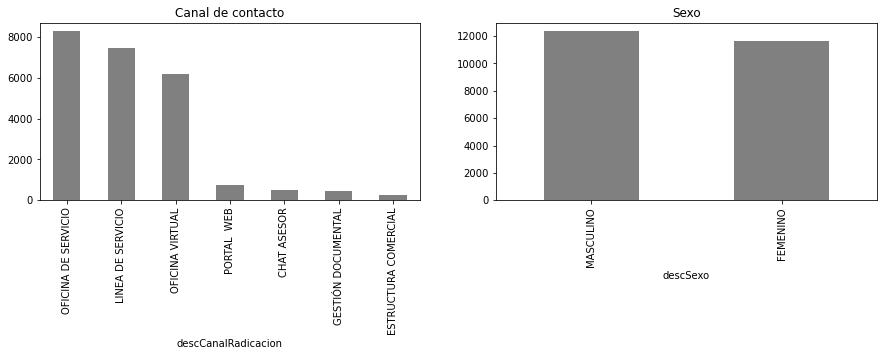

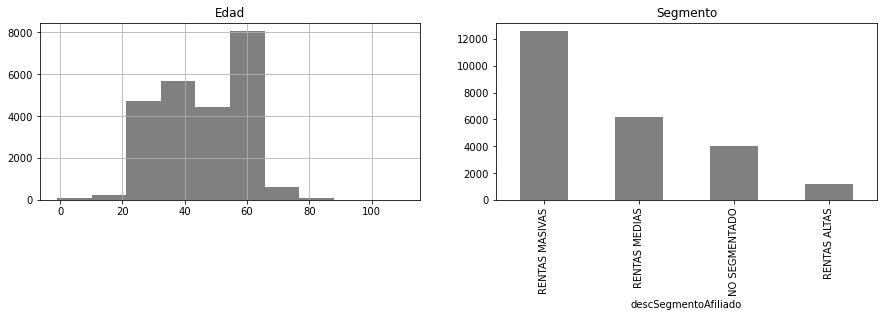

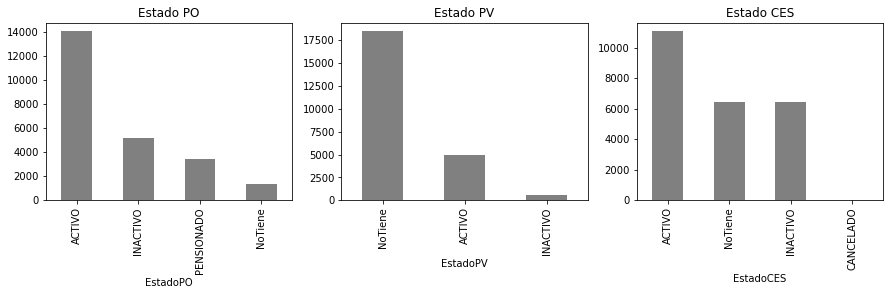

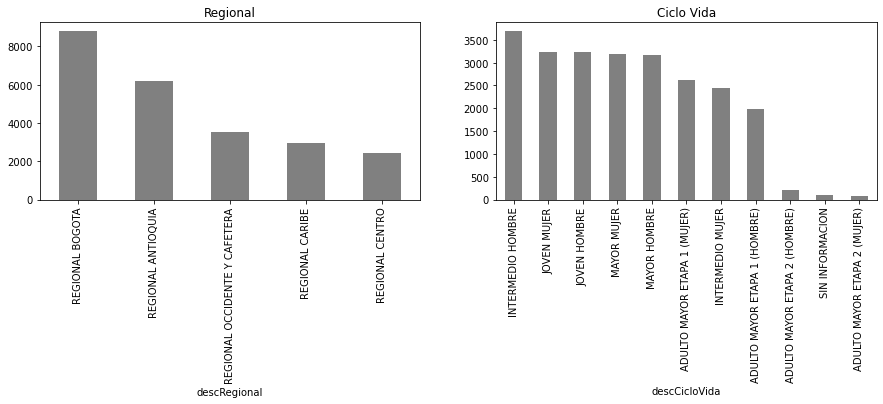

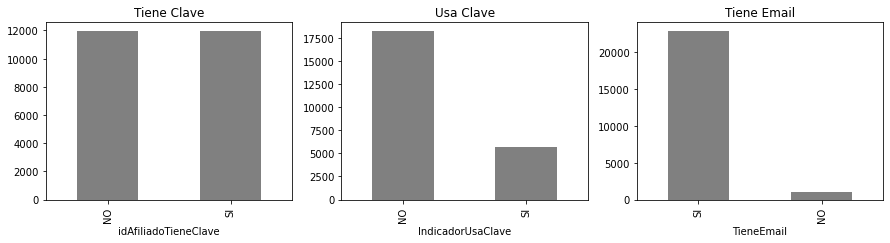

Text(0.5, 1.0, 'Tema de contacto')

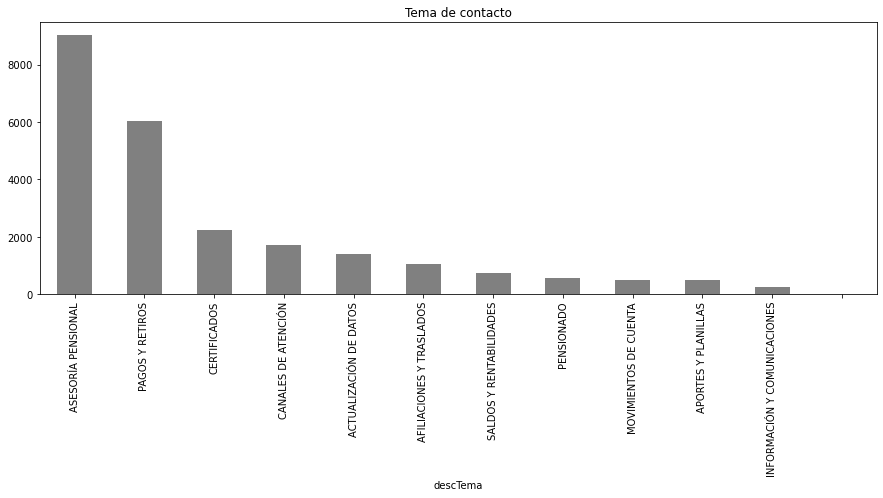

In [ ]:
#Veamos gráficamente como se comporta cada una de las variables

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
df.groupby(df['descCanalRadicacion']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Canal de contacto')

ax = fig.add_subplot(4, 2, 2)
df.groupby(df['descSexo']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Sexo')

plt.show()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
df['edadAfiliado'].hist(color = 'gray')
plt.title('Edad')

ax = fig.add_subplot(4, 2, 2)
df.groupby(df['descSegmentoAfiliado']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Segmento')

plt.show()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4, 3, 1)
df.groupby(df['EstadoPO']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Estado PO')

ax = fig.add_subplot(4, 3, 2)
df.groupby(df['EstadoPV']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Estado PV')

ax = fig.add_subplot(4, 3, 3)
df.groupby(df['EstadoCES']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Estado CES')

plt.show()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
df.groupby(df['descRegional']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Regional')

ax = fig.add_subplot(4, 2, 2)
df.groupby(df['descCicloVida']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Ciclo Vida')

plt.show()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4, 3, 1)
df.groupby(df['idAfiliadoTieneClave']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Tiene Clave')

ax = fig.add_subplot(4, 3, 2)
df.groupby(df['IndicadorUsaClave']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Usa Clave')

ax = fig.add_subplot(4, 3, 3)
df.groupby(df['TieneEmail']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Tiene Email')

plt.show()

fig = plt.figure(figsize=(15,5))
df.groupby(df['descTema']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'gray')
plt.title('Tema de contacto')



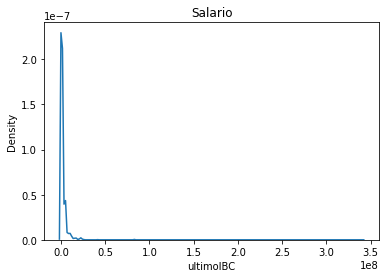

In [ ]:
import seaborn as sns

df_aux = df.loc[:,["ultimoIBC","afi_hash64"]]

bars = sns.kdeplot(data=df_aux, x="ultimoIBC")
plt.title('Salario')
plt.show()

**Importante**

* Podemos notar que los datos estan muy desbalanceados en cuanto, principalmente en el canal de contacto que es nuestra variable objetivo, por lo tanto es necesario utilizar un modelo que tenga en cuenta ese desbalance y pueda generar un mejor resultados en la validación.
* En cuanto al sexo, es una variable que dentro de la muestra podemos ver que tiene una composición muy parecida.
* Hay unas edades que no son normales en el negocio, como los menores de 18 años ya que para estos clientes son los adultos responsables quienes nos contactan, además hay edades muy altas que no son los normal.

## **5. Análisis bivariable**
Veamos el comportamiento de las características con respecto a la variable objetivo

In [ ]:
import seaborn as sns

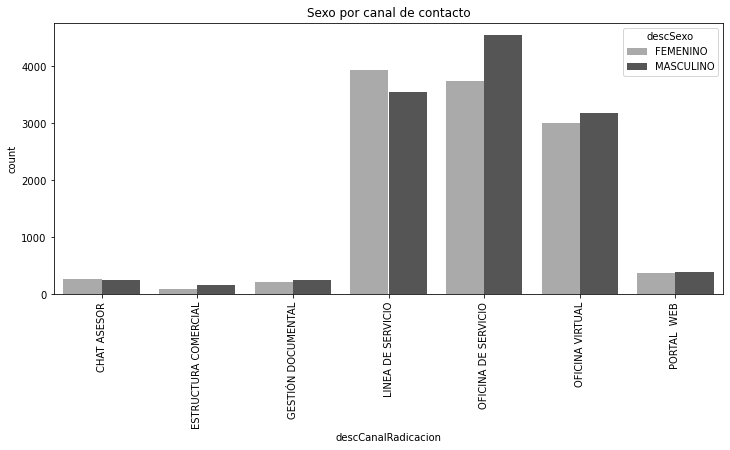

In [ ]:
# ¿Cómo es el comportamiento de los contactos por canal de acuerdo con el sexo del cliente?

df_aux = df.loc[:,["descSexo","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","descSexo",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "descSexo", palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('Sexo por canal de contacto')
plt.show()

La composición entre clientes hombres y mujeres es muy homogéneo, y logramos ver en los canales tradicionales asistidos por un asesor, que las mujeres tienen una ligera tendencia por el canal tefefónico y los hombre por el canal presencial.

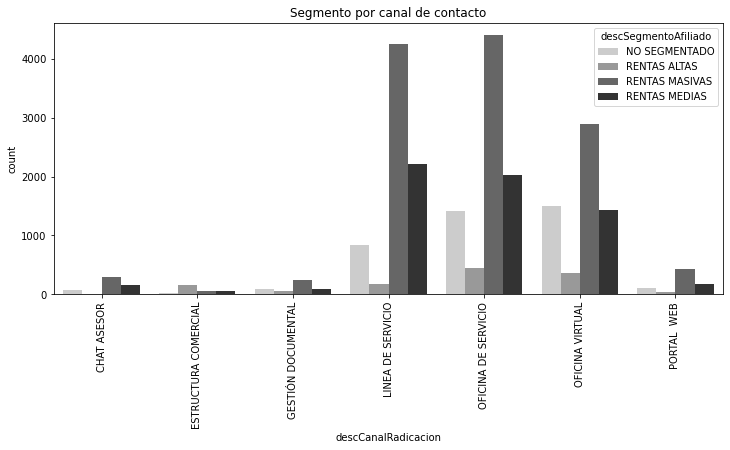

In [ ]:
# Comportamiento de la segmentación del cliente por canal

df_aux = df.loc[:,["descSegmentoAfiliado","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","descSegmentoAfiliado",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "descSegmentoAfiliado",palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('Segmento por canal de contacto')
plt.show()

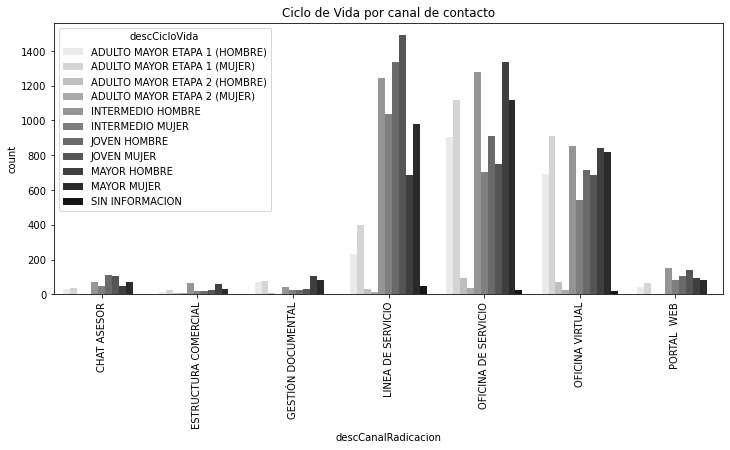

In [ ]:
# ¿Cómo es el comportamiento de los contactos por canal de acuerdo con el Ciclo de vida del cliente?

df_aux = df.loc[:,["descCicloVida","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","descCicloVida",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "descCicloVida", palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('Ciclo de Vida por canal de contacto')
plt.show()

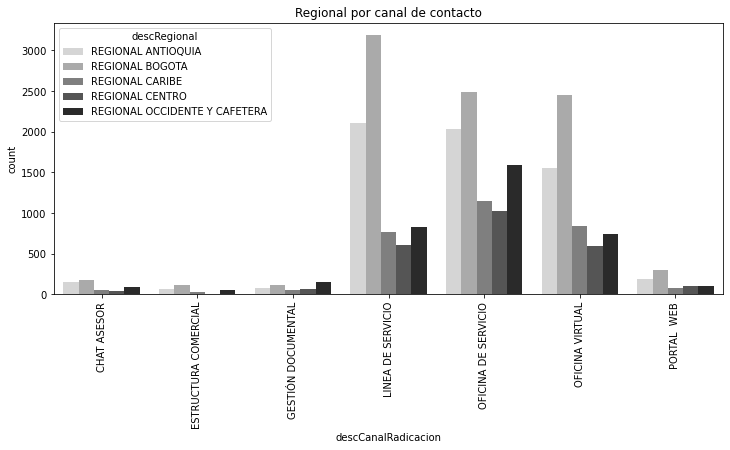

In [ ]:
# ¿Cómo es el comportamiento de los contactos por canal de acuerdo con la regional del cliente?

df_aux = df.loc[:,["descRegional","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","descRegional",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "descRegional", palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('Regional por canal de contacto')
plt.show()

En cuanto a los segmentos que mas usan los canales, hay una diferencia importnate es los segmentos rentas masivas por la línea de servicio y oficinas físicas, esto se debe también a que son los canales definidos para atender este tipo de clientes.
Es de resaltar que los clientes rentas altas deberian contactarnos principalmente a traves de su asesor comercial, pero no hay una gran mayoria que sigue usando los canales tradicionales.

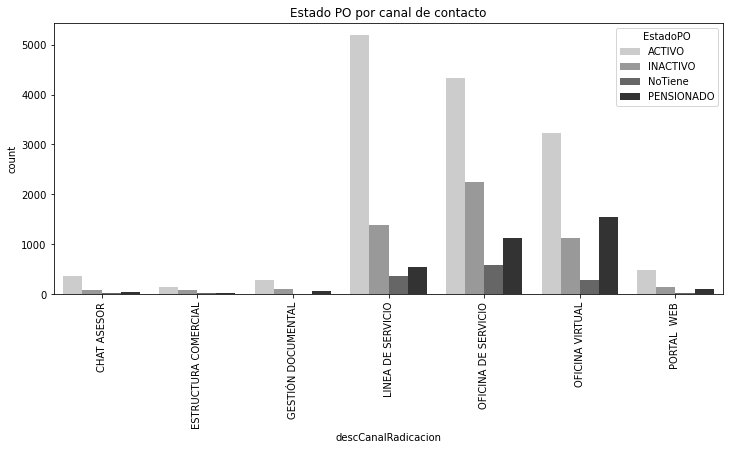

In [ ]:
# Estado en ahorro obligatorio por canal

df_aux = df.loc[:,["EstadoPO","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","EstadoPO",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "EstadoPO",palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('Estado PO por canal de contacto')
plt.show()

Podemos notar que los clientes activos en ahorro obligatorio perfieren usar los canales línea de servicio y oficina de servicio.

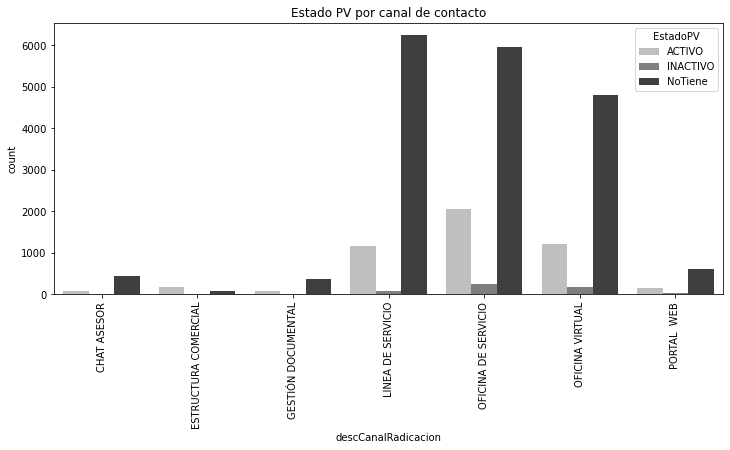

In [ ]:
# Estado en ahorro voluntario por canal

df_aux = df.loc[:,["EstadoPV","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","EstadoPV",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "EstadoPV",palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('Estado PV por canal de contacto')
plt.show()

Los clientes que más usan la línea o oficina de servicio no estan activos en los productos de ahorro voluntario

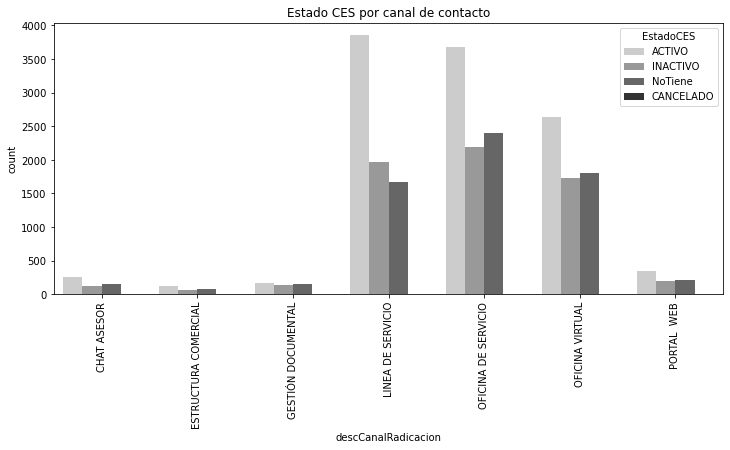

In [ ]:
# Estado en Cesantias por canal

df_aux = df.loc[:,["EstadoCES","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","EstadoCES",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "EstadoCES",palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('Estado CES por canal de contacto')
plt.show()

Los usuarios activos en cesantías utilizan mayormente los canales de oficia y línea de servicio 

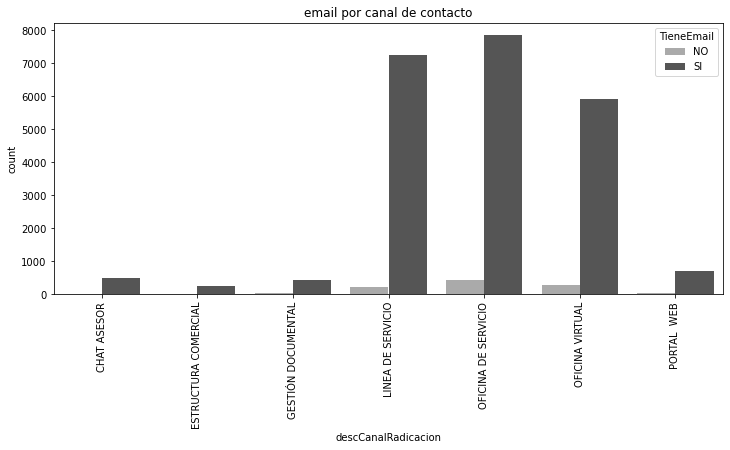

In [ ]:
# revisar comportamiento de los clientes si tienes email o no

df_aux = df.loc[:,["TieneEmail","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","TieneEmail",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "TieneEmail", palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('email por canal de contacto')
plt.show()

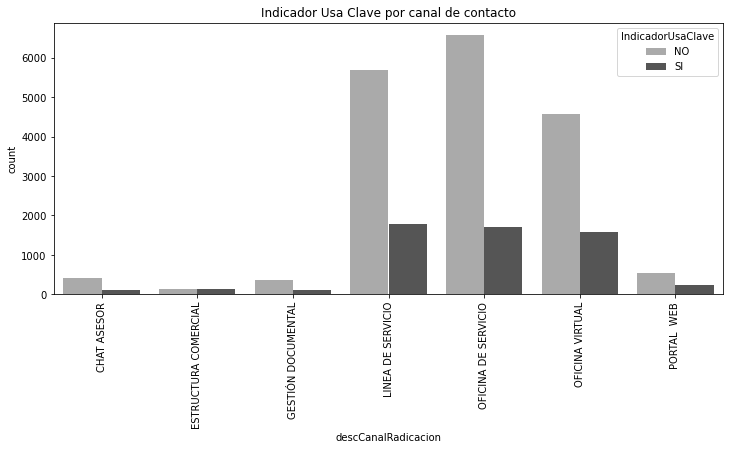

In [ ]:
# revisar comportamiento de los clientes si usan clave  o no

df_aux = df.loc[:,["IndicadorUsaClave","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","IndicadorUsaClave",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "IndicadorUsaClave", palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('Indicador Usa Clave por canal de contacto')
plt.show()

Text(0.5, 1.0, 'Indicador Tiene Clave por canal de contacto')

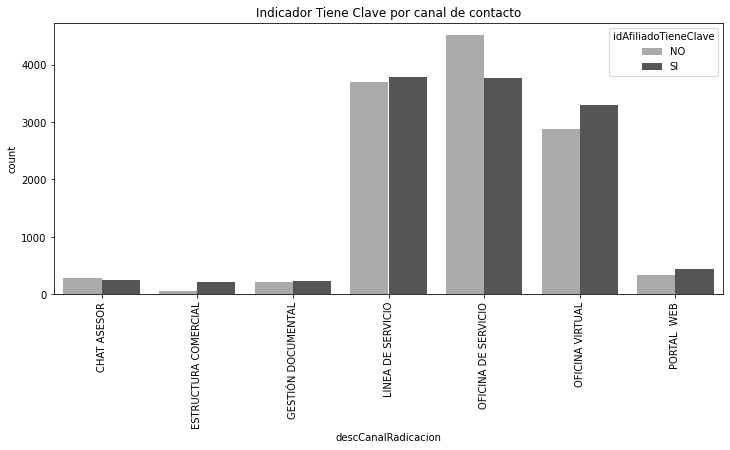

In [ ]:
# revisar comportamiento de los clientes si usan clave  o no

df_aux = df.loc[:,["idAfiliadoTieneClave","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","idAfiliadoTieneClave",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "idAfiliadoTieneClave", palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('Indicador Tiene Clave por canal de contacto')

Text(0.5, 1.0, 'Tema por canal de contacto')

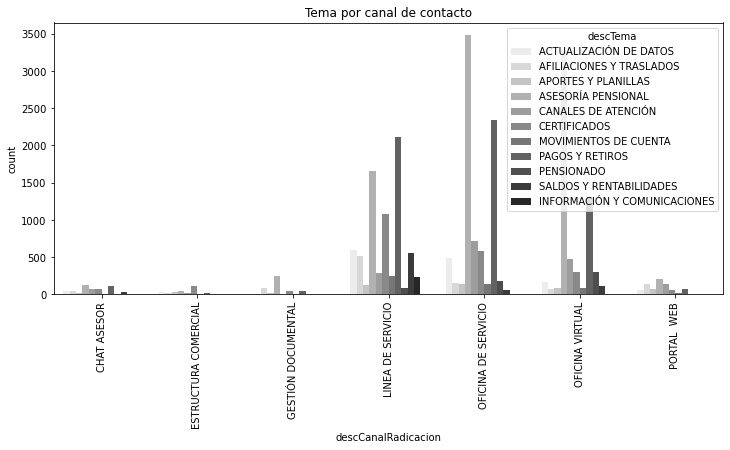

In [ ]:
# revisar comportamiento de los clientes si usan clave  o no

df_aux = df.loc[:,["descTema","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","descTema",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "descTema", palette = 'gist_gray_r')
plt.xticks(rotation = 90)
plt.title('Tema por canal de contacto')

In [ ]:
# Principales temas de contacto y canal

df_aux = df.loc[:,["descTema","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","descTema",]).sum().reset_index()
df_aux = df_aux.sort_values(by= 'count', ascending = False)
df_aux.head(10)

,descCanalRadicacion,descTema,count
44,OFICINA DE SERVICIO,ASESORÍA PENSIONAL,3476
55,OFICINA VIRTUAL,ASESORÍA PENSIONAL,3267
48,OFICINA DE SERVICIO,PAGOS Y RETIROS,2346
37,LINEA DE SERVICIO,PAGOS Y RETIROS,2107
32,LINEA DE SERVICIO,ASESORÍA PENSIONAL,1661
59,OFICINA VIRTUAL,PAGOS Y RETIROS,1313
34,LINEA DE SERVICIO,CERTIFICADOS,1080
45,OFICINA DE SERVICIO,CANALES DE ATENCIÓN,717
29,LINEA DE SERVICIO,ACTUALIZACIÓN DE DATOS,589
46,OFICINA DE SERVICIO,CERTIFICADOS,576


### **5.1 Correlación entre las variables**

In [ ]:
#Cambiemos el tipo de datos de las variables para poder usar un codificación Label Encoder

df['descTema'] = df['descTema'].astype('str')
df['descCanalRadicacion'] = df['descCanalRadicacion'].astype('str')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].astype('str')
df['descCicloVida'] = df['descCicloVida'].astype('str')
df['descOcupacion'] = df['descOcupacion'].astype('str')
df['descRegional'] = df['descRegional'].astype('str')

In [ ]:
# Codificación de las variables

from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas
LE = LabelEncoder()
df2 = df[['afi_hash64','descTema','descSexo', 'descSegmentoAfiliado', 'edadAfiliado', 
          'EstadoPO', 'EstadoPV', 'EstadoCES', 'ultimoIBC','IndicadorUsaClave', 'idAfiliadoTieneClave', 'TieneEmail',
          'descCicloVida','descOcupacion', 'descRegional' , 'descCanalRadicacion']]
df2 = df2[df2.descCanalRadicacion.isin(['LINEA DE SERVICIO', 'OFICINA DE SERVICIO', 'OFICINA VIRTUAL'])]
df2['afi_hash64'] = LE.fit_transform(df2['afi_hash64'])
df2["descTema"] = LE.fit_transform(df2['descTema'])
df2["descSexo"] = LE.fit_transform(df2['descSexo'])
df2["descSegmentoAfiliado"] = LE.fit_transform(df2['descSegmentoAfiliado'])
df2["EstadoPO"] = LE.fit_transform(df2['EstadoPO'])
df2["EstadoPV"] = LE.fit_transform(df2['EstadoPV'])
df2["EstadoCES"] = LE.fit_transform(df2['EstadoCES'])
df2["descCanalRadicacion"] = LE.fit_transform(df2['descCanalRadicacion'])
df2["IndicadorUsaClave"] = LE.fit_transform(df2['IndicadorUsaClave'])
df2["idAfiliadoTieneClave"] = LE.fit_transform(df2['idAfiliadoTieneClave'])
df2["TieneEmail"] = LE.fit_transform(df2['TieneEmail'])
df2["descCicloVida"] = LE.fit_transform(df2['descCicloVida'])
df2["descOcupacion"] = LE.fit_transform(df2['descOcupacion'])
df2["descRegional"] = LE.fit_transform(df2['descRegional'])

In [ ]:
#Correlación entre las varibales predictora y con la variable objetivo:

df2.corr()

,afi_hash64,descTema,descSexo,descSegmentoAfiliado,edadAfiliado,EstadoPO,EstadoPV,EstadoCES,ultimoIBC,IndicadorUsaClave,idAfiliadoTieneClave,TieneEmail,descCicloVida,descOcupacion,descRegional,descCanalRadicacion
afi_hash64,1.000000,-0.013432,0.001001,-0.007901,0.019640,0.034644,-0.015018,0.014172,0.006124,0.012209,0.013930,0.010594,-0.006497,-0.005977,0.025881,0.008528
descTema,-0.013432,1.000000,0.002240,0.114645,-0.223353,-0.000872,-0.162704,-0.201635,0.107801,0.056732,0.083514,0.027255,0.046887,-0.036941,-0.075339,-0.084665
descSexo,0.001001,0.002240,1.000000,-0.050895,0.049498,0.018196,-0.005189,0.013977,0.049144,-0.039880,-0.047626,-0.053354,-0.150563,-0.009057,0.054305,0.034680
descSegmentoAfiliado,-0.007901,0.114645,-0.050895,1.000000,-0.280865,-0.510926,-0.126994,-0.441734,0.011331,-0.006629,0.042451,0.165228,0.178179,-0.020416,0.028510,-0.144325
edadAfiliado,0.019640,-0.223353,0.049498,-0.280865,1.000000,0.352973,-0.052461,0.255383,-0.014208,-0.008211,0.025703,-0.027588,-0.349823,-0.032457,0.079021,0.212943
EstadoPO,0.034644,-0.000872,0.018196,-0.510926,0.352973,1.000000,-0.114685,0.116689,0.047112,0.051642,0.082810,-0.010267,-0.213413,-0.033286,-0.040222,0.189117
EstadoPV,-0.015018,-0.162704,-0.005189,-0.126994,-0.052461,-0.114685,1.000000,0.018860,-0.272284,-0.126803,-0.177008,-0.090818,0.041942,0.123269,0.053491,-0.052738
EstadoCES,0.014172,-0.201635,0.013977,-0.441734,0.255383,0.116689,0.018860,1.000000,-0.072660,-0.060688,-0.150184,-0.105743,-0.136028,0.072790,0.073138,0.076273
ultimoIBC,0.006124,0.107801,0.049144,0.011331,-0.014208,0.047112,-0.272284,-0.072660,1.000000,0.099351,0.130085,0.058054,0.010526,-0.078864,-0.007437,0.011022
IndicadorUsaClave,0.012209,0.056732,-0.039880,-0.006629,-0.008211,0.051642,-0.126803,-0.060688,0.099351,1.000000,0.555881,0.107031,0.012297,-0.098030,-0.048581,0.014215


Nos interesan las correlaciones entre varibales predictoras inferiores a 0.7 ya que una correlación mayor puede indicar que las varibales no estan proporcionando información adicional al modelo, en este caso las variables son completamente independientes por lo tanto las conservamos todas.

Entre las variables predictoras se puede notar que la mayor correlación esta entre estado de Cesantias con el segmento y con la edad del afiliado y el estado en PO que también influye en el segmento del afiliado.

## **6. Tratamiento de outliers**

In [ ]:
# Eliminamos los registros de clientes que de acuerdo con el conocimiento del negocio no nos contactan normalmente

df3 = df2.drop(df.index[ (df['edadAfiliado'] > 90) & (df['edadAfiliado'] < 18)])

In [ ]:
df = df.drop(df.index[ (df['edadAfiliado'] > 90) & (df['edadAfiliado'] < 18)])

## **7. Almacenar Dataset en bigquery**
Se crea una tabla en GPC para guardar los datos preprocesados, justo antes de realizar la codificación de las variables, esto con el fin de poder consultar este dataset limpio en los experimientos que se realizaran posteriormente.

In [ ]:
import pandas_gbq as bgq
project_id = 'XXXX'
pandas_gbq.to_gbq(df,'ubicacion del proyecto',project_id=project_id,if_exists = 'replace')

1it [00:05,  5.13s/it]
